In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
import matplotlib.ticker as mtick

In [2]:
CanESM_csv_names = ['CanESM.csv', 'CanESM_ag.csv', 'CanESM_ww.csv', 'CanESM_out.csv', 'CanESM_in.csv', 'CanESM_mar.csv']
CESM1BGC_csv_names = ['CESM1BGC.csv', 'CESM1BGC_ag.csv', 'CESM1BGC_ww.csv', 'CESM1BGC_out.csv', 'CESM1BGC_in.csv', 'CESM1BGC_mar.csv']  
CMCCCM_csv_names = ['CMCCCM.csv', 'CMCCCM_ag.csv', 'CMCCCM_ww.csv', 'CMCCCM_out.csv', 'CMCCCM_in.csv', 'CMCCCM_mar.csv']  

In [3]:
#create dfs from the .csvs
def create_dfs_from_csvs (dfs_name_list):
    for name in dfs_name_list:
        df_name = name.replace('.csv', '')
        if not df_name.startswith('df'):
            df_name = 'df'+ df_name
        globals()[df_name] = pd.read_csv(name)


In [4]:
create_dfs_from_csvs(CanESM_csv_names)
create_dfs_from_csvs(CESM1BGC_csv_names)
create_dfs_from_csvs(CMCCCM_csv_names)
create_dfs_from_csvs(['RefLOCA.csv'])

In [5]:
#filter the dfs to only include the year 2020 and after
dfCanESM2020 = dfCanESM[(dfCanESM['Year'] >= 2020)]
dfCanESM2020_in = dfCanESM_in[(dfCanESM_in['Year'] >= 2020)]
dfCanESM2020_out = dfCanESM_out[(dfCanESM_out['Year'] >= 2020)]
dfCanESM2020_ag = dfCanESM_ag[(dfCanESM_ag['Year'] >= 2020)]
dfCanESM2020_ww = dfCanESM_ww[(dfCanESM_ag['Year'] >= 2020)]
dfCanESM2020_mar = dfCanESM_mar[(dfCanESM_ag['Year'] >= 2020)]

dfCESM1BGC2020 = dfCESM1BGC[(dfCESM1BGC['Year'] >= 2020)]
dfCESM1BGC2020_in = dfCESM1BGC_in[(dfCESM1BGC_in['Year'] >= 2020)]
dfCESM1BGC2020_out = dfCESM1BGC_out[(dfCESM1BGC_out['Year'] >= 2020)]
dfCESM1BGC2020_ag = dfCESM1BGC_ag[(dfCESM1BGC_ag['Year'] >= 2020)]
dfCESM1BGC2020_ww = dfCESM1BGC_ww[(dfCESM1BGC_ag['Year'] >= 2020)]
dfCESM1BGC2020_mar = dfCESM1BGC_mar[(dfCESM1BGC_ag['Year'] >= 2020)]

dfCMCCCM2020 = dfCMCCCM[(dfCMCCCM['Year'] >= 2020)]
dfCMCCCM2020_in = dfCMCCCM_in[(dfCMCCCM_in['Year'] >= 2020)]
dfCMCCCM2020_out = dfCMCCCM_out[(dfCMCCCM_out['Year'] >= 2020)]
dfCMCCCM2020_ag = dfCMCCCM_ag[(dfCMCCCM_ag['Year'] >= 2020)]
dfCMCCCM2020_ww = dfCMCCCM_ww[(dfCMCCCM_ag['Year'] >= 2020)]
dfCMCCCM2020_mar = dfCMCCCM_mar[(dfCMCCCM_ag['Year'] >= 2020)]

dfRefLOCA2020 = dfRefLOCA[(dfRefLOCA['Year'] >= 2020)]

In [6]:
#this will calculate the following 6 values, all in relation to the baseline_df
#urban indoor coverage, urban outdoor coverage, ag coverage, total gw storage, electric use, hydro generation
def compare_total_values (baseline_df, df_compare_list):

    #Calculate totals for baseline coverage
    indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    electric_demand = baseline_df['Total_GwH'].sum()
    hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0, 0, 0, 0, 0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    #create a list of comparison lists that can be populated in a loop
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        electric_demand_compare = df['Total_GwH'].sum()
        hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        normalized_electric_demand = electric_demand_compare / electric_demand
        normalized_electric_demand = (1 / normalized_electric_demand)-1
        normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        lst.append(normalized_indoor_coverage)
        lst.append(normalized_outdoor_coverage)
        lst.append(normalized_ag_coverage)
        lst.append(normalized_groundwater)
        lst.append(normalized_electric_demand)
        lst.append(normalized_hydropower_generation)
        lst.append(normalized_indoor_coverage)
    
    # #print all values for debugging
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

In [7]:
#this will calculate the following 3 values, all in relation to the baseline_df
#urban indoor coverage, urban outdoor coverage, electric use
def compare_total_values_in (baseline_df, df_compare_list):

    #Calculate totals for baseline coverage
    indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    # ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    # ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    # groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    electric_demand = baseline_df['Total_GwH'].sum()
    # hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0, 0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        # ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        # ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        # groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        electric_demand_compare = df['Total_GwH'].sum()
        # hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        # ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        # normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        # normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        normalized_electric_demand = electric_demand_compare / electric_demand
        normalized_electric_demand = (1 / normalized_electric_demand)-1
        # normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        lst.append(normalized_indoor_coverage)
        lst.append(normalized_outdoor_coverage)
        # lst.append(normalized_ag_coverage)
        # lst.append(normalized_groundwater)
        lst.append(normalized_electric_demand)
        # lst.append(normalized_hydropower_generation)
        lst.append(normalized_indoor_coverage)
    
    # #print all values for debugging
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

In [8]:
#this will calculate the urban outdoor coverage in relation to the baseline_df
def compare_total_values_out (baseline_df, df_compare_list):

    #Calculate totals for baseline coverage
    # indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    # indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    # ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    # indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    # ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    # groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    # electric_demand = baseline_df['Total_GwH'].sum()
    # hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        # indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        # ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        # indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        # ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        # groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        # electric_demand_compare = df['Total_GwH'].sum()
        # hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        # indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        # ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        # normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        # normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        # normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        # normalized_electric_demand = electric_demand_compare / electric_demand
        # normalized_electric_demand = (1 / normalized_electric_demand)-1
        # normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        # lst.append(normalized_indoor_coverage)
        lst.append(normalized_outdoor_coverage)
        # lst.append(normalized_ag_coverage)
        # lst.append(normalized_groundwater)
        # lst.append(normalized_electric_demand)
        # lst.append(normalized_hydropower_generation)
        lst.append(normalized_outdoor_coverage)
    
    # #print all values for debugging
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

In [9]:
#this will calculate the following 4 values, all in relation to the baseline_df
#ag coverage, total gw storage, electric use, hydro generation
def compare_total_values_ag (baseline_df, df_compare_list):
    # indoor_supply_delivered_adapt = df_adapt['Supply_Del_Indoor_Total[AF]'].sum()
    # outdoor_supply_delivered_adapt = df_adapt['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered_adapt = df_adapt['Supply_Del_Ag_Total[AF]'].sum()

    #Calculate totals for baseline coverage
    # indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    # outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    # indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    # outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    # indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    # outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    electric_demand = baseline_df['Total_GwH'].sum()
    hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0, 0, 0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        # indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        # outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        # indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        # outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        electric_demand_compare = df['Total_GwH'].sum()
        hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        # indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        # outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        # normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        # normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        normalized_electric_demand = electric_demand_compare / electric_demand
        normalized_electric_demand = (1 / normalized_electric_demand)-1
        normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        # lst.append(normalized_indoor_coverage)
        # lst.append(normalized_outdoor_coverage)
        lst.append(normalized_ag_coverage)
        lst.append(normalized_groundwater)
        lst.append(normalized_electric_demand)
        lst.append(normalized_hydropower_generation)
        lst.append(normalized_ag_coverage)
    
    # #print all values for debugging
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

In [10]:
#this will calculate the following 4 values, all in relation to the baseline_df
#urban indoor coverage, urban outdoor coverage,total gw storage, electric use,
def compare_total_values_ww (baseline_df, df_compare_list):
    # indoor_supply_delivered_adapt = df_adapt['Supply_Del_Indoor_Total[AF]'].sum()
    # outdoor_supply_delivered_adapt = df_adapt['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered_adapt = df_adapt['Supply_Del_Ag_Total[AF]'].sum()

    #Calculate totals for baseline coverage
    indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    # ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    # ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    electric_demand = baseline_df['Total_GwH'].sum()
    # hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0, 0, 0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        # ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        # ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        electric_demand_compare = df['Total_GwH'].sum()
        # hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        # ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        # normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        normalized_electric_demand = electric_demand_compare / electric_demand
        normalized_electric_demand = (1 / normalized_electric_demand)-1
        # normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        lst.append(normalized_indoor_coverage)
        lst.append(normalized_outdoor_coverage)
        # lst.append(normalized_ag_coverage)
        lst.append(normalized_groundwater)
        lst.append(normalized_electric_demand)
        # lst.append(normalized_hydropower_generation)
        lst.append(normalized_indoor_coverage)
    
    # #print all values for debuggin
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

In [11]:
#it will calculate the following 3 values, all in relation to the baseline_df
#ag coverage, total gw storage, electric use
def compare_total_values_mar (baseline_df, df_compare_list):
    # indoor_supply_delivered_adapt = df_adapt['Supply_Del_Indoor_Total[AF]'].sum()
    # outdoor_supply_delivered_adapt = df_adapt['Supply_Del_Outdoor_Total[AF]'].sum()
    # ag_supply_delivered_adapt = df_adapt['Supply_Del_Ag_Total[AF]'].sum()

    #Calculate totals for baseline coverage
    # indoor_supply_delivered = baseline_df['Supply_Del_Indoor_Total[AF]'].sum()
    # outdoor_supply_delivered = baseline_df['Supply_Del_Outdoor_Total[AF]'].sum()
    ag_supply_delivered = baseline_df['Supply_Del_Ag_Total[AF]'].sum()
    # indoor_unmet_demand = baseline_df['Unmet_Demand_Indoor_Total[AF]'].sum()
    # outdoor_unmet_demand = baseline_df['Unmet_Demand_Outdoor_Total[AF]'].sum()
    ag_unmet_demand = baseline_df['Unmet_Demand_Ag_Total[AF]'].sum()
    
    # indoor_coverage = indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)
    # outdoor_coverage = outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)
    ag_coverage = ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)

    #grab totals for baseline groundwater, energy, and hydropower
    groundwater_storage = baseline_df[baseline_df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
    electric_demand = baseline_df['Total_GwH'].sum()
    # hydropower_generation = baseline_df['Total_hydro_generation'].sum()

    #create a list of values for the baseline scenario
    baseline_values = [0, 0, 0, 0]

    #initialize lists to put comparison values into
    compare1 = []
    compare2 = []
    compare3 = []
    compare_output_lists = [compare1, compare2, compare3]

    for df, lst in zip(df_compare_list, compare_output_lists): 
    #calculate totals for comparison situation
        # indoor_supply_delivered_compare = df['Supply_Del_Indoor_Total[AF]'].sum()
        # outdoor_supply_delivered_compare = df['Supply_Del_Outdoor_Total[AF]'].sum()
        ag_supply_delivered_compare = df['Supply_Del_Ag_Total[AF]'].sum()
        # indoor_unmet_demand_compare = df['Unmet_Demand_Indoor_Total[AF]'].sum()
        # outdoor_unmet_demand_compare = df['Unmet_Demand_Outdoor_Total[AF]'].sum()
        ag_unmet_demand_compare = df['Unmet_Demand_Ag_Total[AF]'].sum()
        
        groundwater_storage_compare = df[df['Date'] == '2070-12-01']['Total_gw_storage'].values[0]
        electric_demand_compare = df['Total_GwH'].sum()
        # hydropower_generation_compare = df['Total_hydro_generation'].sum()
        
        #calculate outputs
        # indoor_coverage_compare = indoor_supply_delivered_compare / (indoor_supply_delivered_compare + indoor_unmet_demand_compare)
        # outdoor_coverage_compare = outdoor_supply_delivered_compare / (outdoor_supply_delivered_compare + outdoor_unmet_demand_compare)
        ag_coverage_compare = ag_supply_delivered_compare / (ag_supply_delivered_compare + ag_unmet_demand_compare)
    
        #normalize values, subtract by 1 to reduce by 100%, and only show the change in percentage
        # normalized_indoor_coverage = (indoor_coverage_compare / indoor_coverage)-1
        # normalized_outdoor_coverage = (outdoor_coverage_compare / outdoor_coverage)-1
        normalized_ag_coverage = (ag_coverage_compare / ag_coverage)-1

        normalized_groundwater = (groundwater_storage_compare / groundwater_storage)-1
        normalized_electric_demand = electric_demand_compare / electric_demand
        normalized_electric_demand = (1 / normalized_electric_demand)-1
        # normalized_hydropower_generation = (hydropower_generation_compare / hydropower_generation)-1
        
        
        # lst.append(normalized_indoor_coverage)
        # lst.append(normalized_outdoor_coverage)
        lst.append(normalized_ag_coverage)
        lst.append(normalized_groundwater)
        lst.append(normalized_electric_demand)
        # lst.append(normalized_hydropower_generation)
        lst.append(normalized_ag_coverage)
    
    # #print all values
    # print('reduction in supply deliveries indoor', indoor_supply_delivered - indoor_supply_delivered_adapt)
    # print('reduction in supply deliveries outdoor', outdoor_supply_delivered - outdoor_supply_delivered_adapt)
    # print('reduction in supply deliveries ag', ag_supply_delivered - ag_supply_delivered_adapt)

    # print('total coverage indoor percent:', (indoor_supply_delivered / (indoor_supply_delivered + indoor_unmet_demand)))
    # print('total coverage outdoor percent:', (outdoor_supply_delivered / (outdoor_supply_delivered + outdoor_unmet_demand)))
    # print('total coverage ag percent:', (ag_supply_delivered / (ag_supply_delivered + ag_unmet_demand)))

    # print('total coverage indoor adapt percent:', (indoor_supply_delivered_adapt / (indoor_supply_delivered_adapt + indoor_unmet_demand_adapt)))
    # print('total coverage outdoor adapt percent:', (outdoor_supply_delivered_adapt / (outdoor_supply_delivered_adapt + outdoor_unmet_demand_adapt)))
    # print('total coverage ag adapt percent:', (ag_supply_delivered_adapt / (ag_supply_delivered_adapt + ag_unmet_demand_adapt)))

    return baseline_values, compare1, compare2, compare3

The following code boxes make radial line graphs (aka 'spider plots' which we used as an intermediate analysis step

In [12]:
def make_radial_graph(baseline_df, compare_df_list):
    baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values(baseline_df, compare_df_list)
    categories = ['Indoor Coverage', 'Outdoor Coverage', 'Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation', '']

    CB_color_cycle = ['#984ea3', '#ff7f00', '#f781bf'] #<-- this is the main color scheme for now
    # CB_color_cycle = ['#f768a1', '#fbb4b9', '#ae017e'] #<-- this is the second color scheme
    # CB_color_cycle = ['#fecc5c', '#fd8d3c', '#e31a1c'] #<-- this is the third color scheme
    # CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a'] #<-- this is the fourth color scheme
    # CB_color_cycle = ['#f781bf', '#a65628', '#984ea3'] #<-- this is a test color scheme
    # CB_color_cycle = ['#999999', '#e41a1c', '#dede00'] #<-- this is a test color scheme
    # CB_color_cycle = ['#377eb8', '#984ea3', '#e41a1c'] #<-- this is the fifth color scheme
    # CB_color_cycle = ['#377eb8', '#984ea3', '#ff7f00'] #<-- this is the sixth color scheme

    
    angles = np.linspace(0, 2*np.pi, len(categories))
    
    plt.figure(figsize=(8,8))
    #plt.polar(angles, baseline_values, color='black', label='Reference scenario')
    plt.polar(angles, compare1_values, color=CB_color_cycle[0], label='Hot and Wet')
    plt.polar(angles, compare2_values, color=CB_color_cycle[1], label='Warm and Stable')
    plt.polar(angles, compare3_values, color=CB_color_cycle[2], label='Dry Southwest')
    plt.ylim(-.2, .2)

    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))
    
    plt.xticks(angles, categories, fontsize=14)
    plt.yticks([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
    plt.tick_params(axis='y', pad=4)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.25), fontsize=14)

    # Enable gridlines
    plt.grid(True)
    
    # Get the y-axis gridlines
    ax = plt.gca()  # Get the current Axes object
    gridlines = ax.yaxis.get_gridlines()
    
    # Find the index of the y=0 gridline
    yticks = [-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2]
    y0_index = yticks.index(0)
    
    # Make the y=0 gridline bold
    gridlines[y0_index].set_linewidth(3)
    
    # plt.title('Impact of climate change on metrics of interest')
    plt.show()

In [13]:
def make_radial_graph_with_baselines(baseline_df, compare_df_list, adaptation_type):
    baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values(baseline_df, compare_df_list) #adaptation scenario lists
    baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
    categories = ['Indoor Coverage', 'Outdoor Coverage', 'Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation', '']

    CB_color_cycle = ['#984ea3', '#ff7f00', '#f781bf']
    
    angles = np.linspace(0, 2*np.pi, len(categories))

    plt.figure(figsize=(8,8))

    plt.polar(angles, compare1_values, color=CB_color_cycle[0], label='Hot and Wet with ' + adaptation_type)
    plt.polar(angles, compare2_values, color=CB_color_cycle[1], label='Warm and Stable with ' + adaptation_type)
    plt.polar(angles, compare3_values, color=CB_color_cycle[2], label='Dry Southwest with ' + adaptation_type)
    plt.polar(angles, compare4_values, color=CB_color_cycle[0], label='Hot and Wet only', linestyle='--')
    plt.polar(angles, compare5_values, color=CB_color_cycle[1], label='Warm and Stable only', linestyle='--')
    plt.polar(angles, compare6_values, color=CB_color_cycle[2], label='Dry Southwest only', linestyle='--')
    plt.ylim(-.2, .2)
    
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))

    # Manually set labels with adjusted radius
    label_radius = 0.35  # Adjust this value to move labels further out

    for angle, category in zip(angles, categories):
        plt.text(angle, label_radius, category, ha='center', va='center', fontsize=14)

    plt.yticks([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
    
    plt.tick_params(axis='y')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1.5))

    plt.grid(True)
    
    ax = plt.gca()
    gridlines = ax.yaxis.get_gridlines()
    
    yticks = [-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2]
    y0_index = yticks.index(0)

    #have a thicker line for the reference scenario baseline
    gridlines[y0_index].set_linewidth(3)
    
    #remove degree labels
    ax.set_xticklabels([])
    
    plt.show()

In [14]:
def make_radial_graph_with_baselines_ag(baseline_df, compare_df_list, adaptation_type):
    baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(baseline_df, compare_df_list)
    baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])
    categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation', '']

    CB_color_cycle = ['#984ea3', '#ff7f00', '#f781bf']
    
    angles = np.linspace(0, 2*np.pi, len(categories))

    plt.figure(figsize=(8,8))

    plt.polar(angles, compare1_values, color=CB_color_cycle[0], label='Hot and Wet with ' + adaptation_type)
    plt.polar(angles, compare2_values, color=CB_color_cycle[1], label='Warm and Stable with ' + adaptation_type)
    plt.polar(angles, compare3_values, color=CB_color_cycle[2], label='Dry Southwest with ' + adaptation_type)
    plt.polar(angles, compare4_values, color=CB_color_cycle[0], label='Hot and Wet only', linestyle='--')
    plt.polar(angles, compare5_values, color=CB_color_cycle[1], label='Warm and Stable only', linestyle='--')
    plt.polar(angles, compare6_values, color=CB_color_cycle[2], label='Dry Southwest only', linestyle='--')
    plt.ylim(-.1, .1)
    
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))

    # Manually set labels with adjusted radius
    label_radius = 0.34  # Adjust this value to move labels further out

    for angle, category in zip(angles, categories):
        plt.text(angle, label_radius, category, ha='center', va='center', fontsize=14)

    plt.yticks([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
    
    plt.tick_params(axis='y')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1.5))

    plt.grid(True)
    
    ax = plt.gca()
    gridlines = ax.yaxis.get_gridlines()
    
    yticks = [-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2]
    y0_index = yticks.index(0)

    #have a thicker line for the reference scenario baseline
    gridlines[y0_index].set_linewidth(3)
    
    #remove degree labels
    ax.set_xticklabels([])
    
    plt.show()

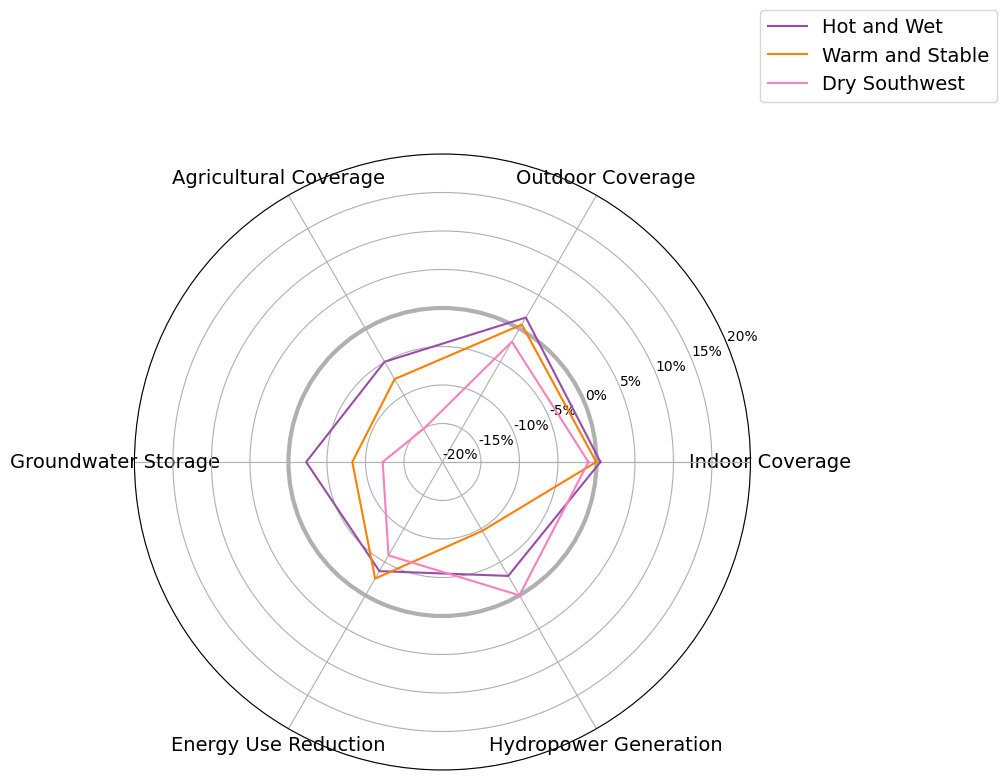

In [15]:
make_radial_graph(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])

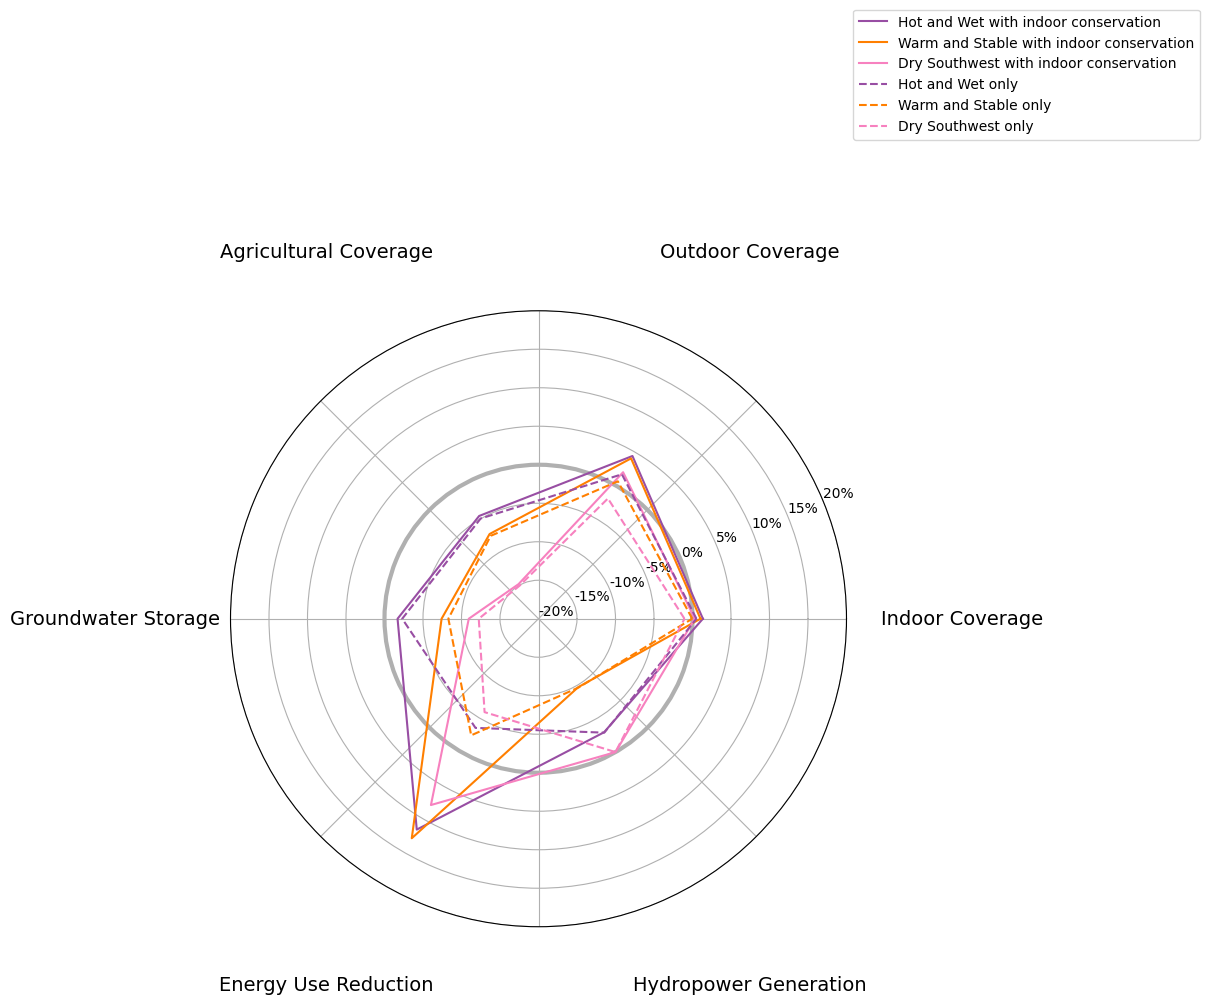

In [16]:
make_radial_graph_with_baselines(dfRefLOCA2020, [dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in], 'indoor conservation')

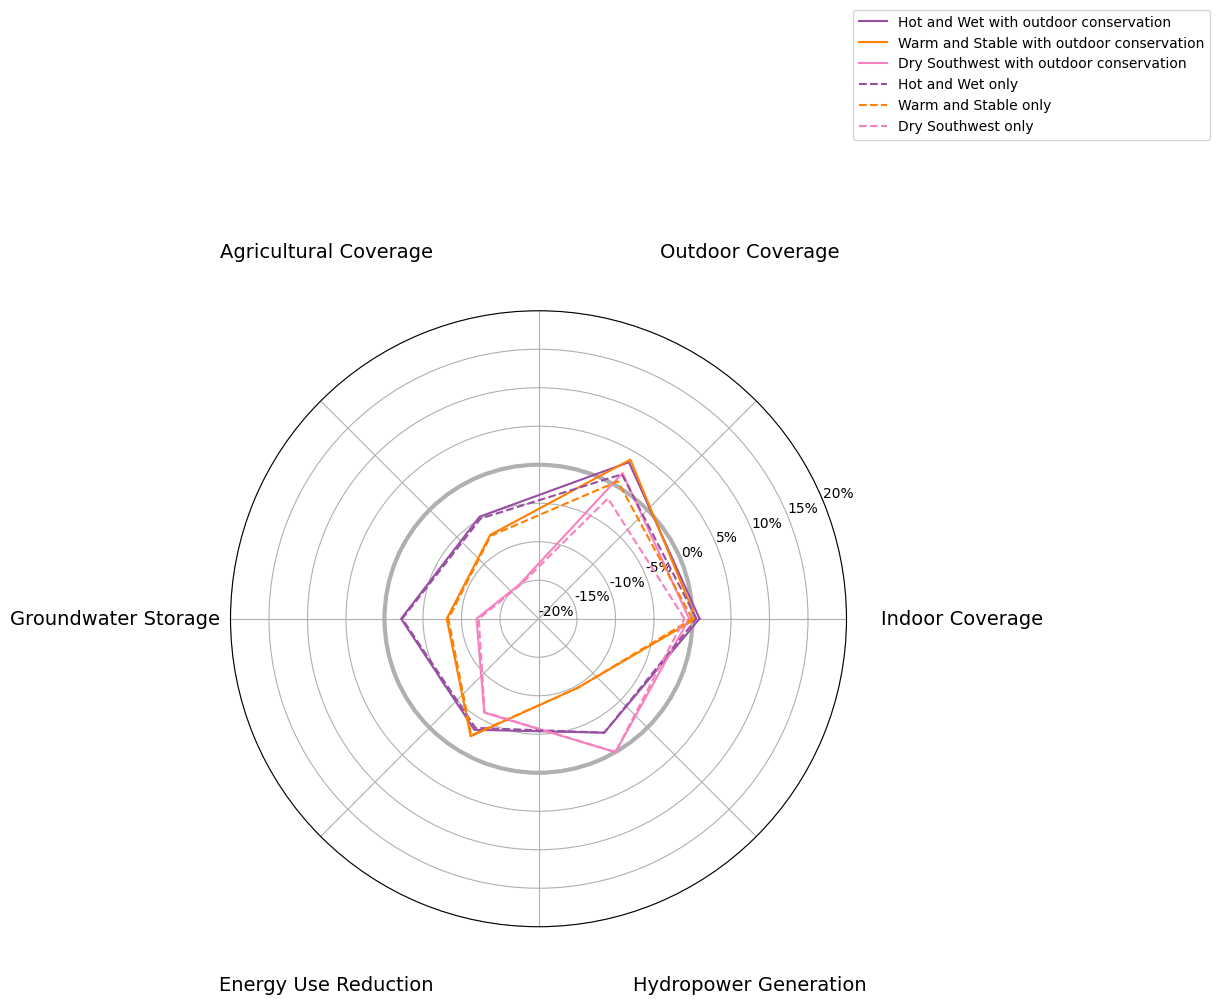

In [17]:
make_radial_graph_with_baselines(dfRefLOCA2020, [dfCanESM2020_out, dfCESM1BGC2020_out, dfCMCCCM2020_out], 'outdoor conservation')

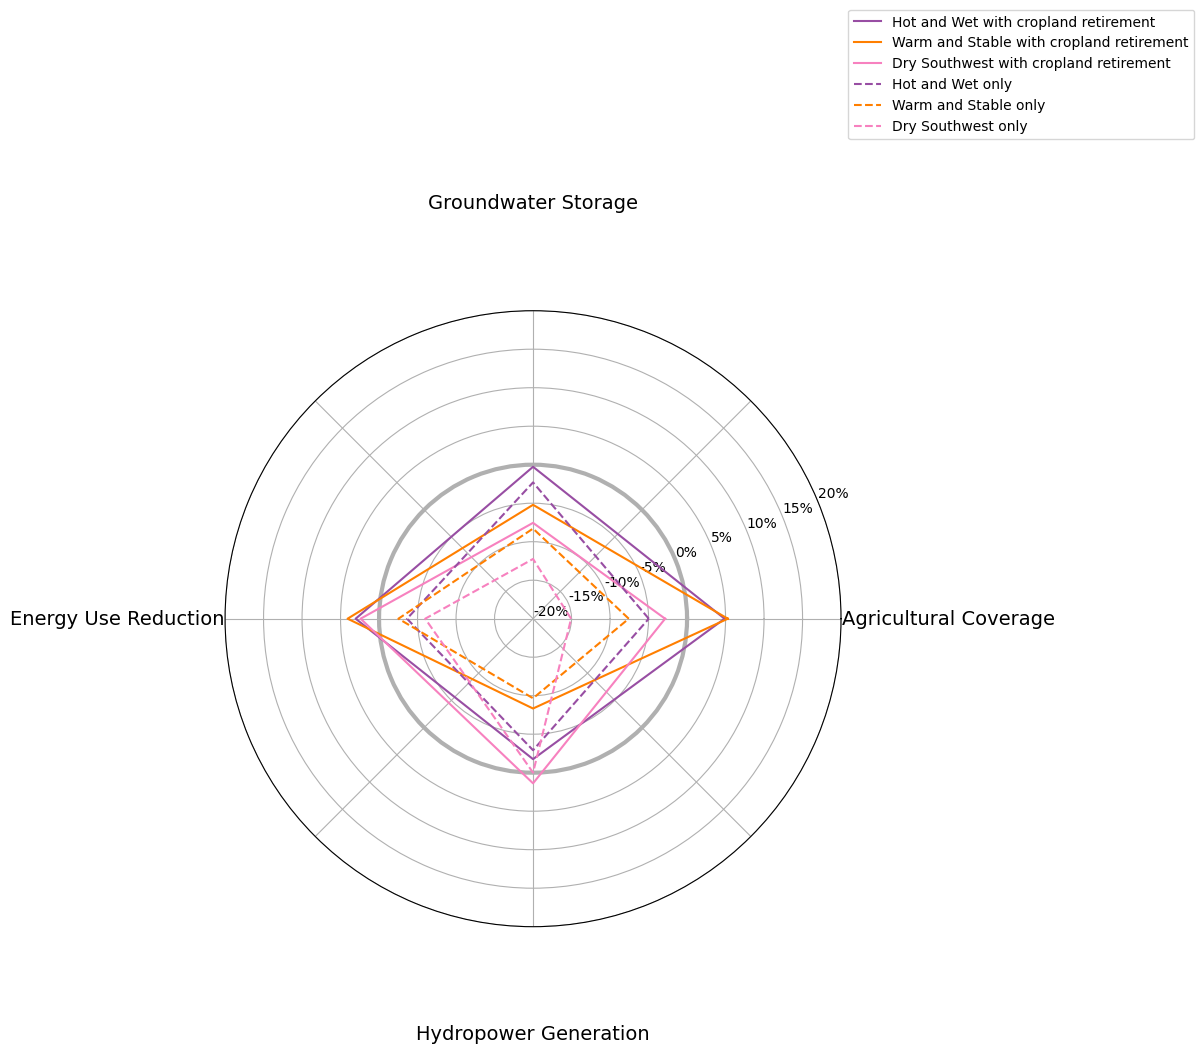

In [18]:
make_radial_graph_with_baselines_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag], 'cropland retirement')

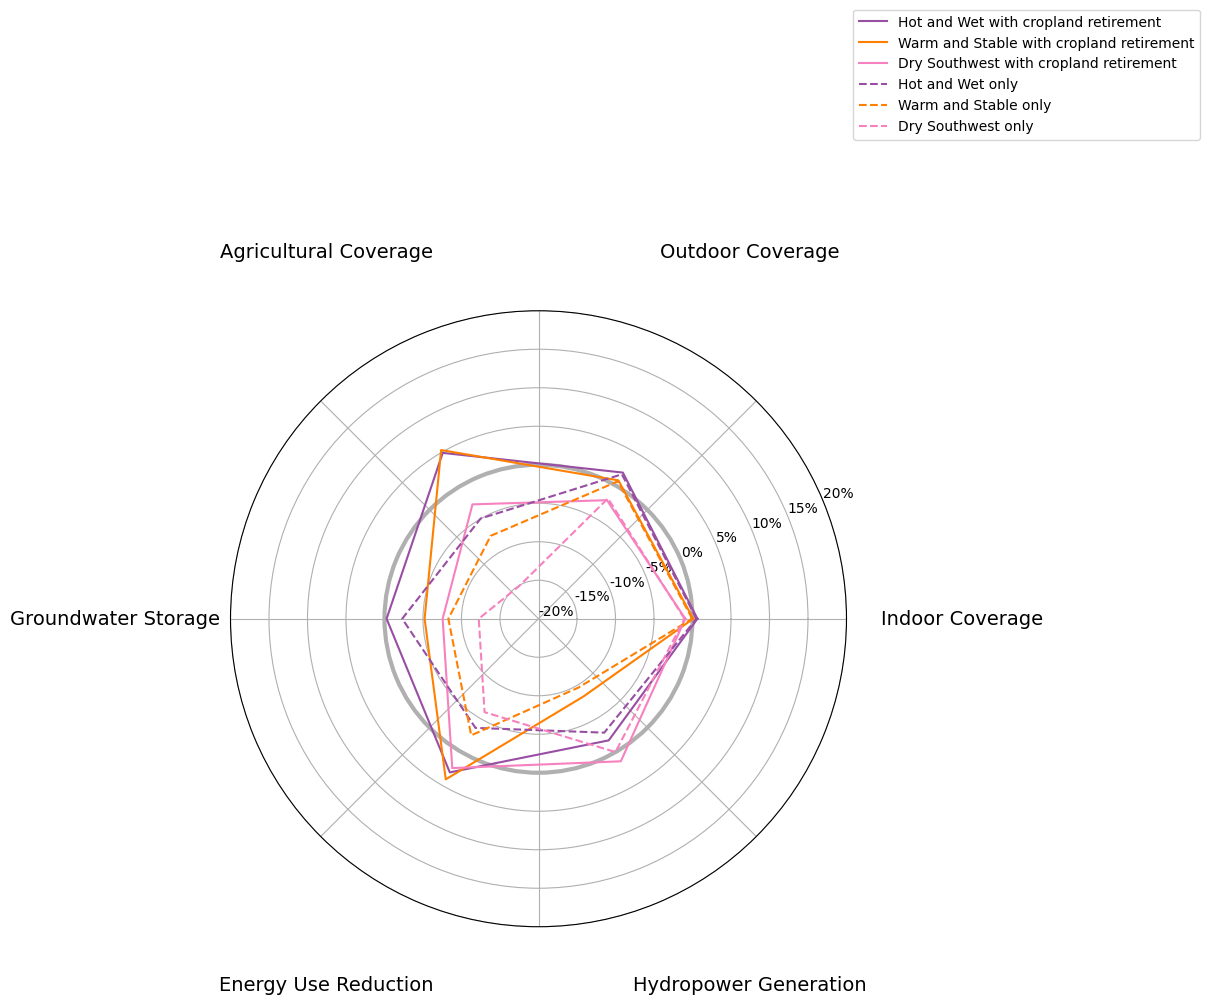

In [19]:
make_radial_graph_with_baselines(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag], 'cropland retirement')

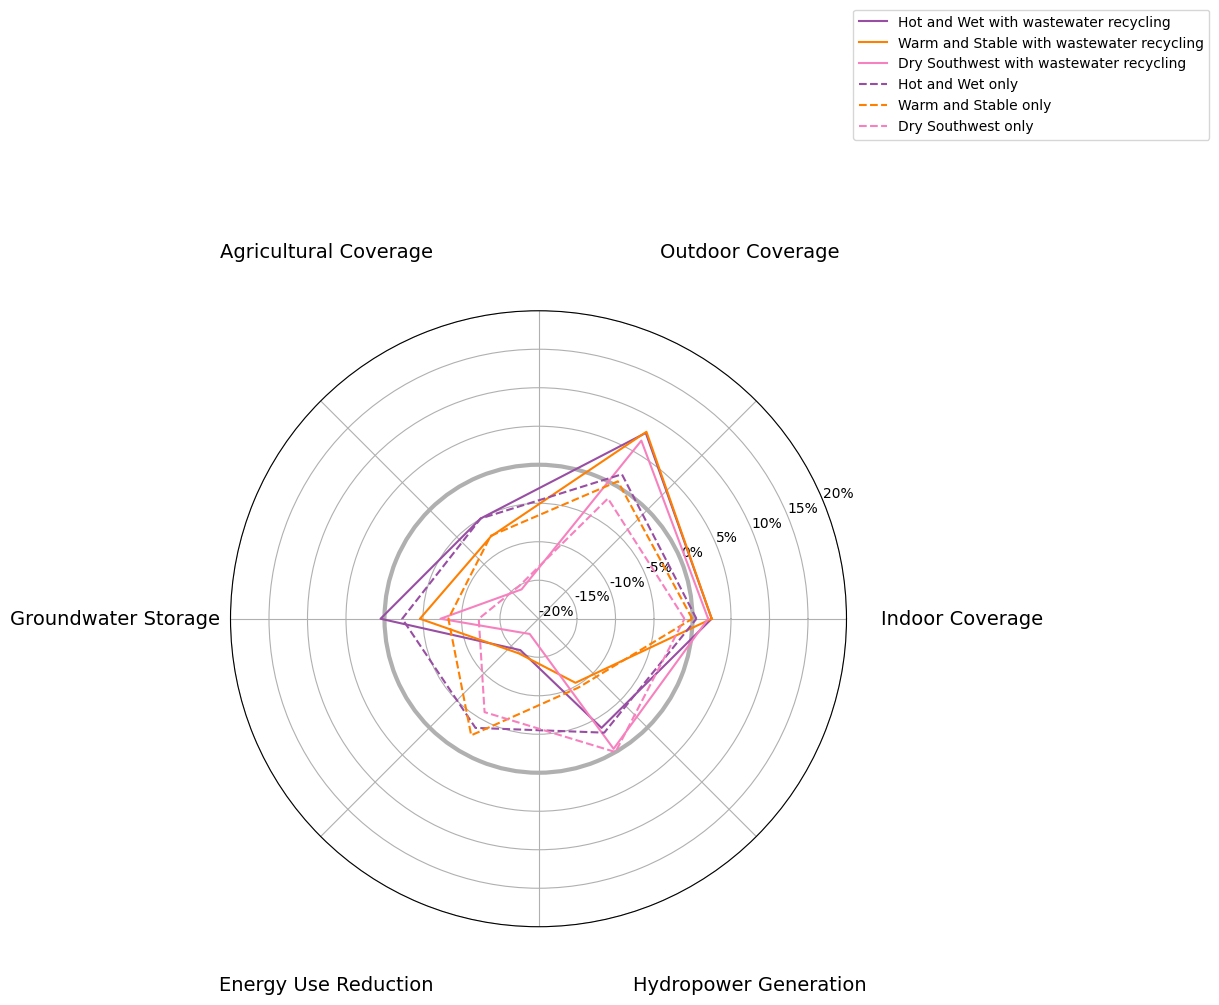

In [20]:
make_radial_graph_with_baselines(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww], 'wastewater recycling')

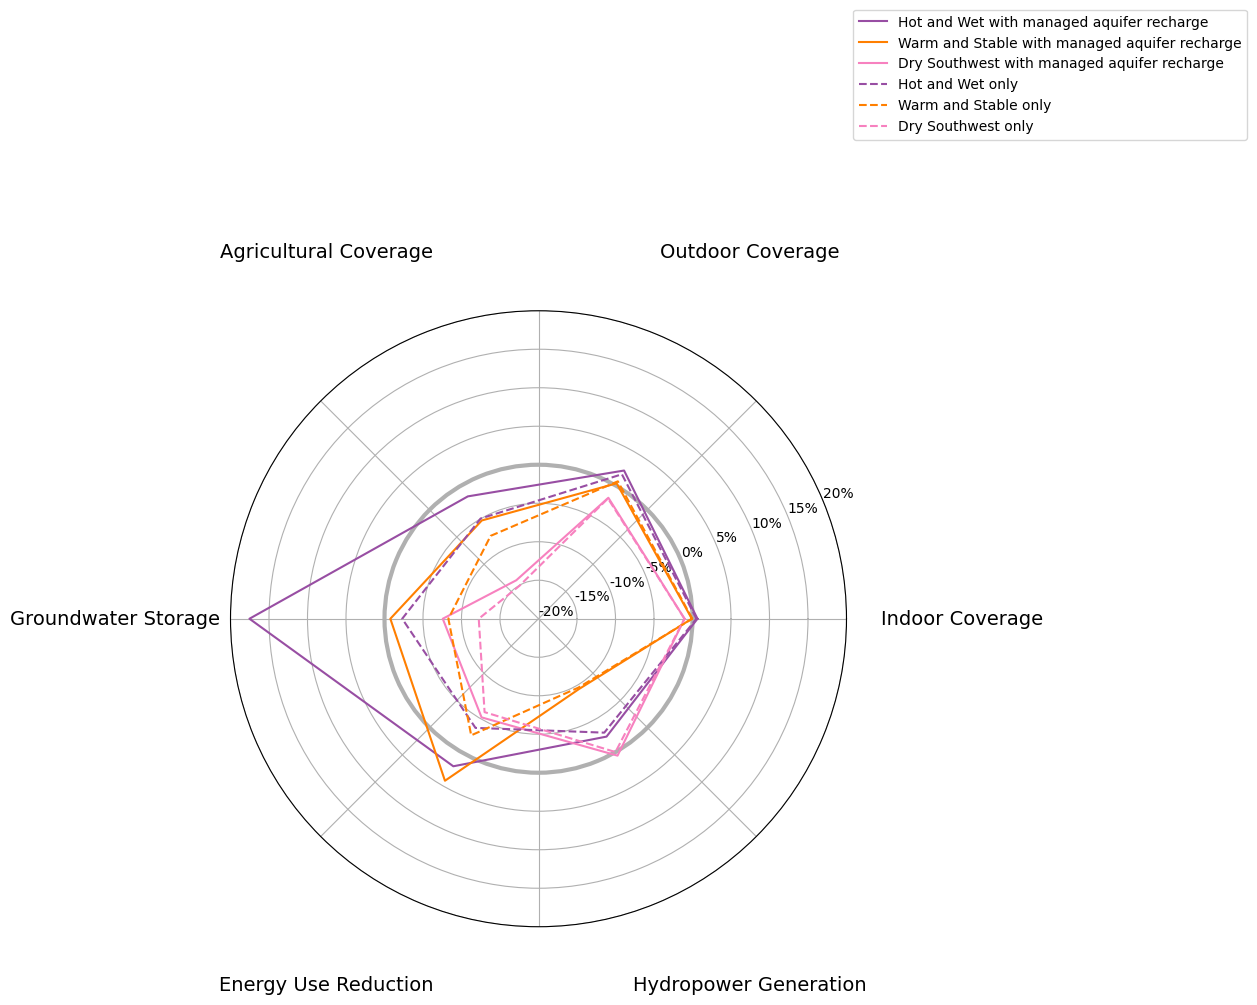

In [21]:
make_radial_graph_with_baselines(dfRefLOCA2020, [dfCanESM2020_mar, dfCESM1BGC2020_mar, dfCMCCCM2020_mar], 'managed aquifer recharge')

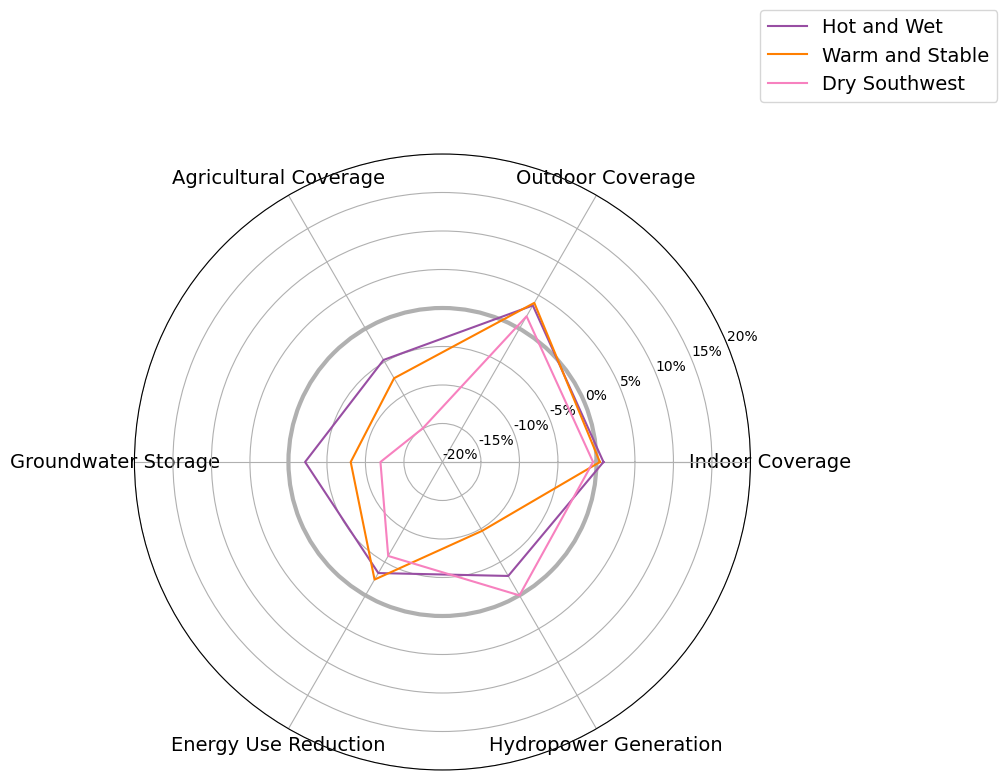

In [22]:
make_radial_graph(dfRefLOCA2020, [dfCanESM2020_out, dfCESM1BGC2020_out, dfCMCCCM2020_out])

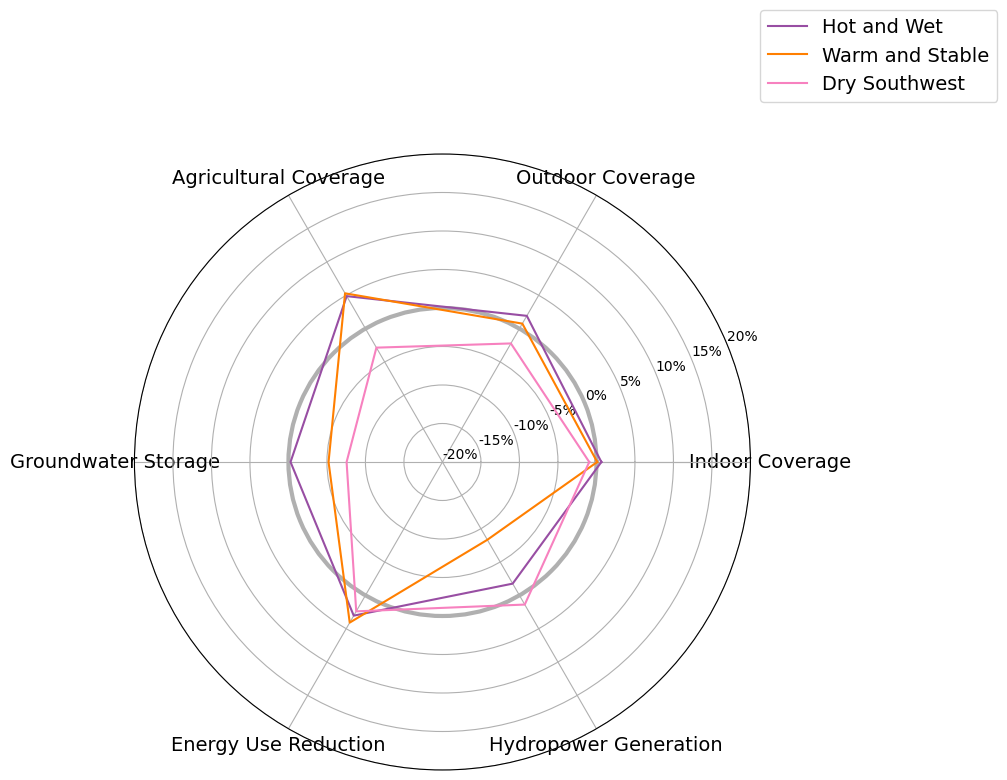

In [23]:
make_radial_graph(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag])

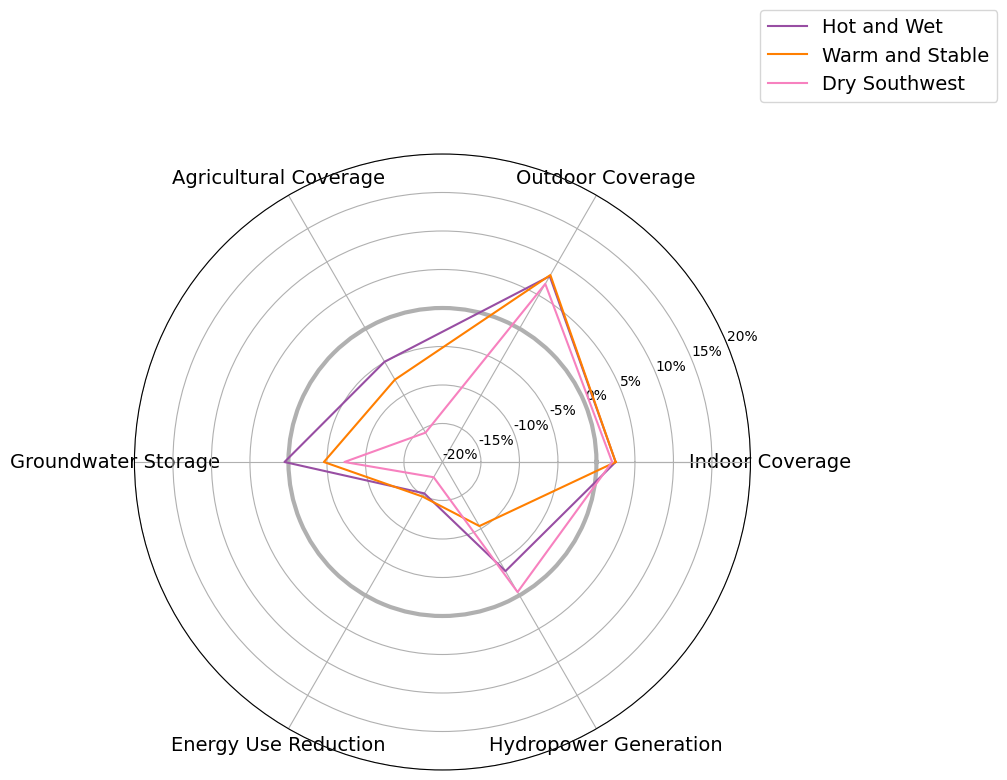

In [24]:
make_radial_graph(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww])

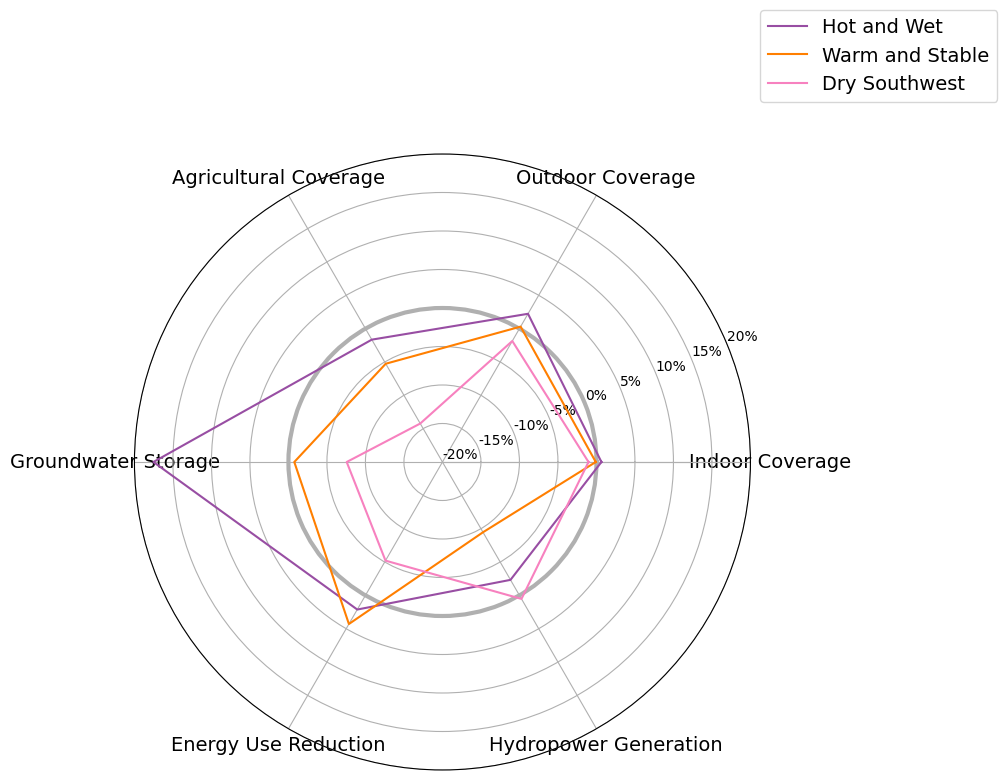

In [25]:
make_radial_graph(dfRefLOCA2020, [dfCanESM2020_mar, dfCESM1BGC2020_mar, dfCMCCCM2020_mar])

In [26]:
# values1 = [-5, -2]
# values2 = [-4, -1]
# labels = ['Value 1', 'Value 2']  # Optional labels

# plt.bar([0], [values1[0]], color='red', label='Negative Value')  # Plot negative bar
# plt.bar([0], [values1[1]], color='blue', label='Positive Value')  # Plot positive bar stacked on top

# plt.bar([1], [values2[0]], color='red', label='Negative Value')  # Plot negative bar
# plt.bar([1], [values2[1]], color='blue', label='Positive Value')  # Plot positive bar stacked on top

# plt.xticks([0], ['Stacked Bar'])  # Set x-axis tick label
# plt.ylabel('Values')
# plt.title('Stacked Bar with Negative and Positive Values')
# plt.legend()
# plt.show()

In [27]:
# baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
# baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']

# for i, (value1,value4,category) in enumerate(zip(compare1_values, compare4_values,categories)):
#     plt.bar([i], [compare4_values[i]], color='red', label=category + ' (no adaptation)')  # Plot negative bar
#     plt.bar([i], [compare1_values[i]], color='blue', label='Positive Value')  # Plot positive bar stacked on top

# plt.xticks([0], ['Ag coverage'])  # Set x-axis tick label
# plt.xticks([1], ['Groundwater storage'])

# plt.gca().yaxis.set_major_formatter(
#         plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
# plt.ylabel('Percent change from reference')
# plt.title('Title')
# plt.legend()
# plt.show()

The cells below create bar charts for each metric of interest that changes signficantly with each adaptation

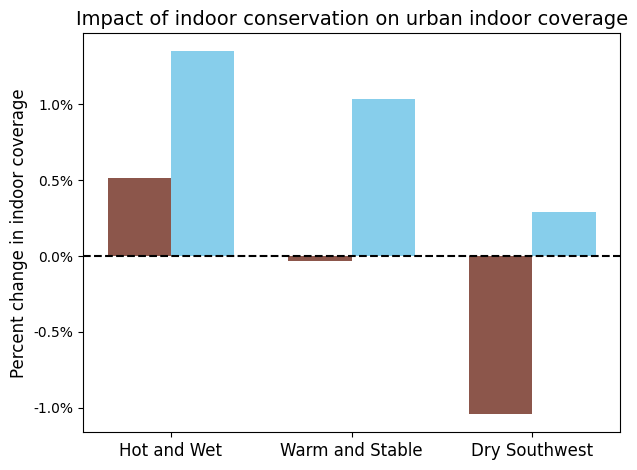

In [28]:
#get metric values with and without indoor conversation, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[0], compare5_values[0], compare6_values[0]]
bar_set2=[compare1_values[0], compare2_values[0], compare3_values[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with indoor conservation', color='#87CEEB')

ax.set_ylabel('Percent change in indoor coverage', fontsize=12)
ax.set_title('Impact of indoor conservation on urban indoor coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.1%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

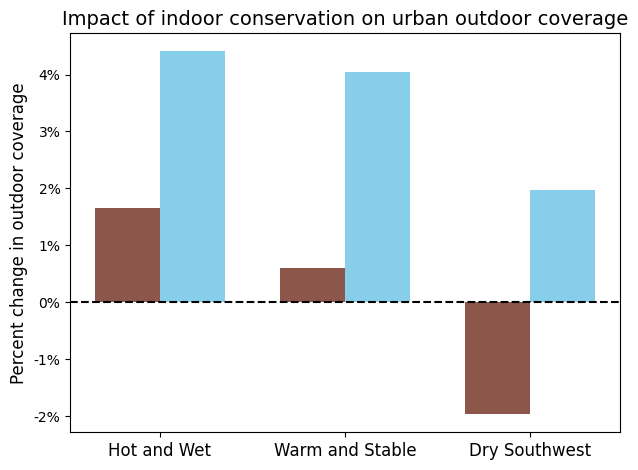

In [29]:
#get metric values with and without indoor conversation, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[1], compare5_values[1], compare6_values[1]]
bar_set2=[compare1_values[1], compare2_values[1], compare3_values[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with indoor conservation', color='#87CEEB')


ax.set_ylabel('Percent change in outdoor coverage', fontsize=12)
ax.set_title('Impact of indoor conservation on urban outdoor coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

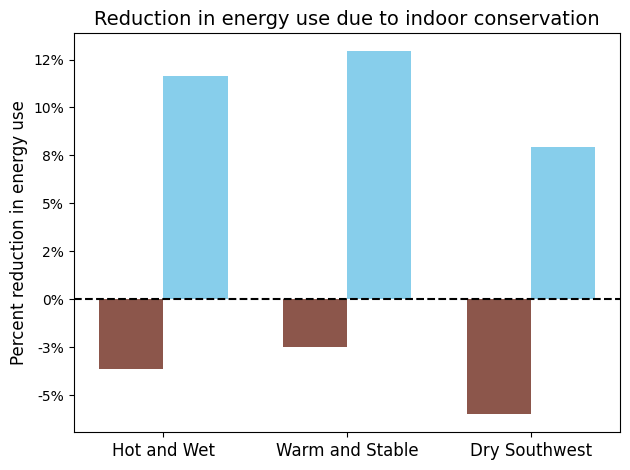

In [30]:
#get metric values with and without indoor conversation, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_in(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[2], compare5_values[2], compare6_values[2]]
bar_set2=[compare1_values[2], compare2_values[2], compare3_values[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with indoor conservation', color='#87CEEB')


ax.set_ylabel('Percent reduction in energy use', fontsize=12)
ax.set_title('Reduction in energy use due to indoor conservation' , fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels , fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

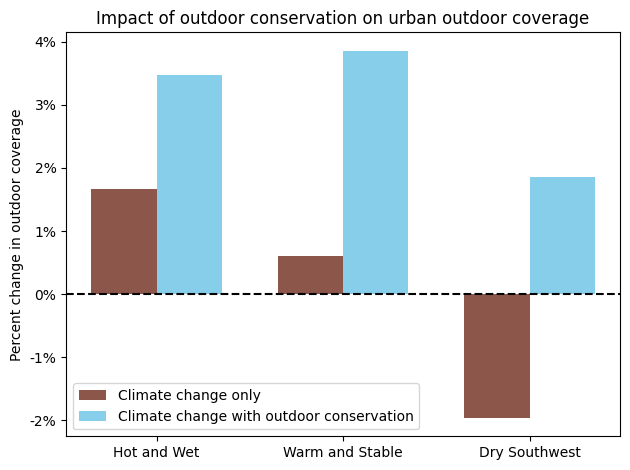

In [31]:
#get metric values with and without outdoor conversation, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_out(dfRefLOCA2020, [dfCanESM2020_out, dfCESM1BGC2020_out, dfCMCCCM2020_out]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_out(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[0], compare5_values[0], compare6_values[0]]
bar_set2=[compare1_values[0], compare2_values[0], compare3_values[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with outdoor conservation', color='#87CEEB')


ax.set_ylabel('Percent change in outdoor coverage')
ax.set_title('Impact of outdoor conservation on urban outdoor coverage')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

In [33]:
# baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
# baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']
# labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']

# plt.bar([0], [compare4_values[0]], color='#8c564b', label='Climate change only')  # Plot negative bar
# plt.bar([0], [compare1_values[0]], color='#87CEEB', label='Climate change with cropland retirement')  # Plot positive bar stacked on top

# plt.bar([1], [compare5_values[0]], color='#8c564b')  # Plot negative bar
# plt.bar([1], [compare2_values[0]], color='#87CEEB')  # Plot positive bar stacked on top

# plt.bar([2], [compare6_values[0]], color='#8c564b')  # Plot negative bar
# plt.bar([2], [compare3_values[0]], color='#87CEEB')  # Plot positive bar stacked on top

# plt.axhline(y=0, color='black', linestyle='--')  # Add a dashed line at y=0

# plt.xticks([0, 1, 2], ['Hot and Wet', 'Warm and Stable', 'Dry Southwest'])

# plt.ylabel('Percent change in agricultural coverage')
# plt.title('Impact of cropland retirement on agricultural coverage')

# plt.gca().yaxis.set_major_formatter(
#         plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))

# plt.legend()
# plt.show()

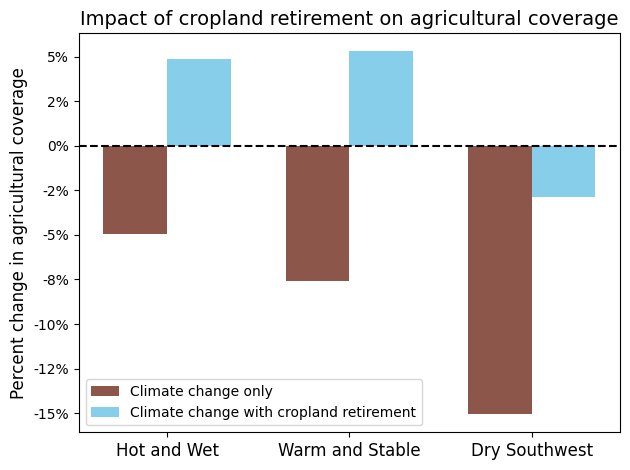

In [32]:
#get metric values with and without cropland retirement, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[0], compare5_values[0], compare6_values[0]]
bar_set2=[compare1_values[0], compare2_values[0], compare3_values[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with cropland retirement', color='#87CEEB')


ax.set_ylabel('Percent change in agricultural coverage', fontsize=12)
ax.set_title('Impact of cropland retirement on agricultural coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

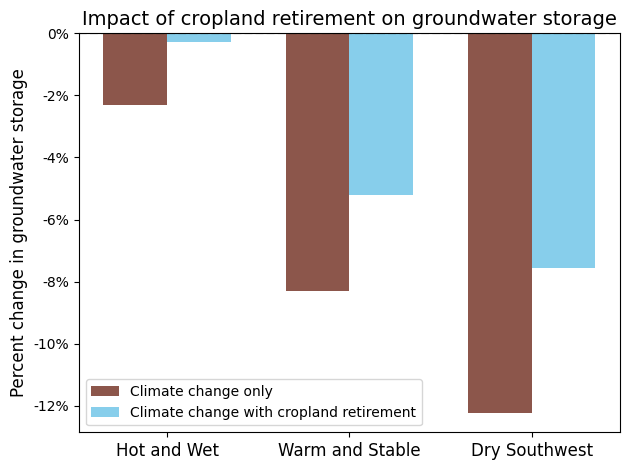

In [42]:
#get metric values with and without cropland retirement, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[1], compare5_values[1], compare6_values[1]]
bar_set2=[compare1_values[1], compare2_values[1], compare3_values[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with cropland retirement', color='#87CEEB')


ax.set_ylabel('Percent change in groundwater storage', fontsize=12)
ax.set_title('Impact of cropland retirement on groundwater storage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

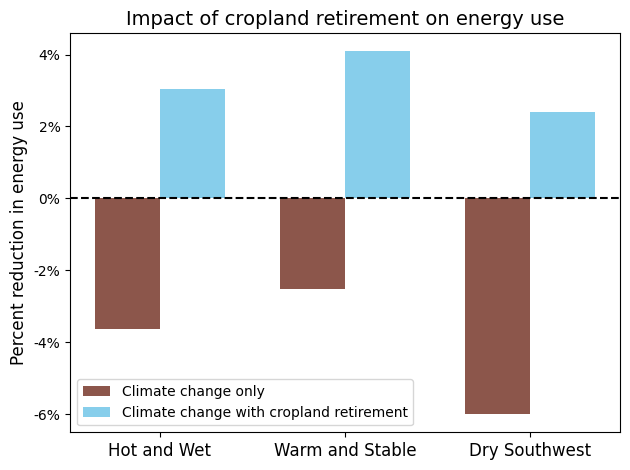

In [43]:
#get metric values with and without cropland retirement, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[2], compare5_values[2], compare6_values[2]]
bar_set2=[compare1_values[2], compare2_values[2], compare3_values[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with cropland retirement', color='#87CEEB')


ax.set_ylabel('Percent reduction in energy use', fontsize=12)
ax.set_title('Impact of cropland retirement on energy use', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

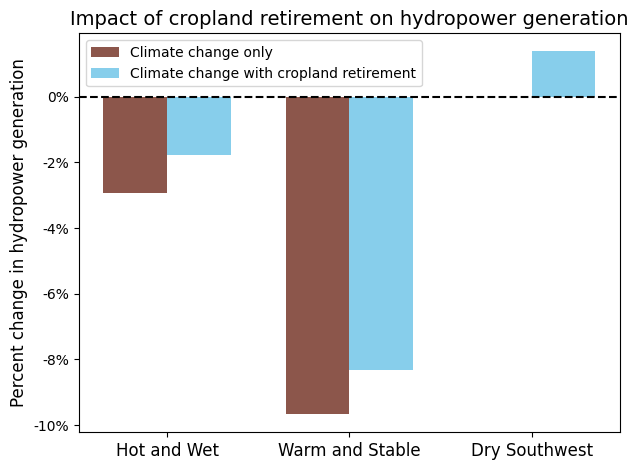

In [44]:
#get metric values with and without cropland retirement, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020_ag, dfCESM1BGC2020_ag, dfCMCCCM2020_ag]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ag(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction', 'Hydropower Generation']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[3], compare5_values[3], compare6_values[3]]
bar_set2=[compare1_values[3], compare2_values[3], compare3_values[3]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with cropland retirement', color='#87CEEB')


ax.set_ylabel('Percent change in hydropower generation', fontsize=12)
ax.set_title('Impact of cropland retirement on hydropower generation', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

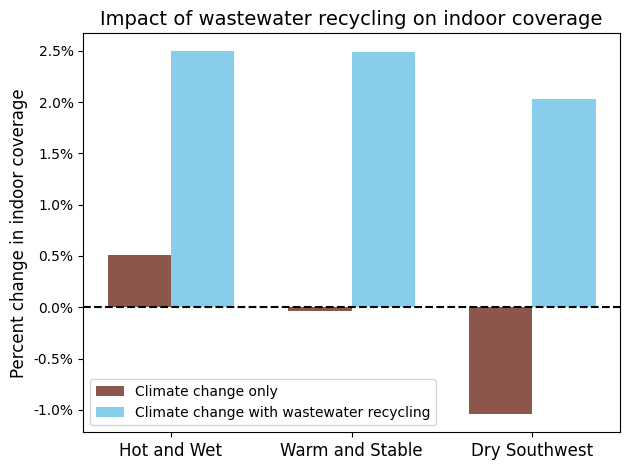

In [45]:
#get metric values with and without wastewater recycling, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[0], compare5_values[0], compare6_values[0]]
bar_set2=[compare1_values[0], compare2_values[0], compare3_values[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with wastewater recycling', color='#87CEEB')


ax.set_ylabel('Percent change in indoor coverage', fontsize=12)
ax.set_title('Impact of wastewater recycling on indoor coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.1%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

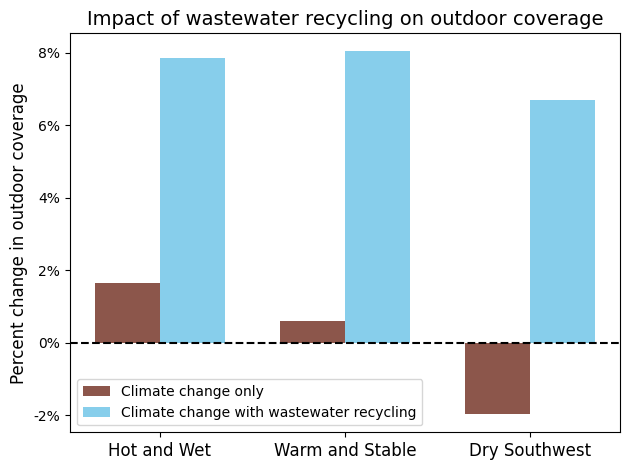

In [46]:
#get metric values with and without wastewater recycling, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[1], compare5_values[1], compare6_values[1]]
bar_set2=[compare1_values[1], compare2_values[1], compare3_values[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with wastewater recycling', color='#87CEEB')


ax.set_ylabel('Percent change in outdoor coverage', fontsize=12)
ax.set_title('Impact of wastewater recycling on outdoor coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

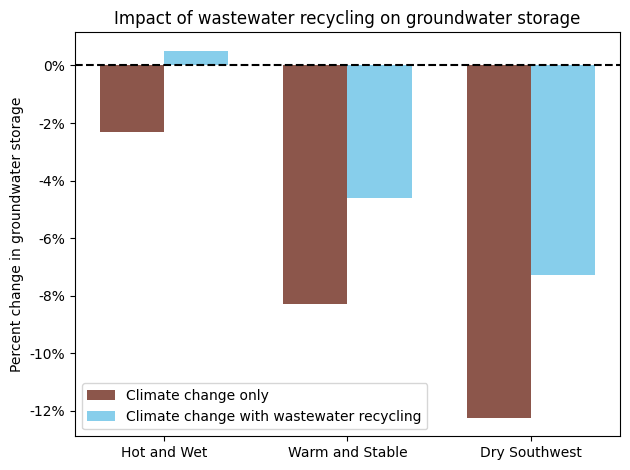

In [46]:
#get metric values with and without wastewater recycling, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[2], compare5_values[2], compare6_values[2]]
bar_set2=[compare1_values[2], compare2_values[2], compare3_values[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with wastewater recycling', color='#87CEEB')


ax.set_ylabel('Percent change in groundwater storage', fontsize=12)
ax.set_title('Impact of wastewater recycling on groundwater storage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

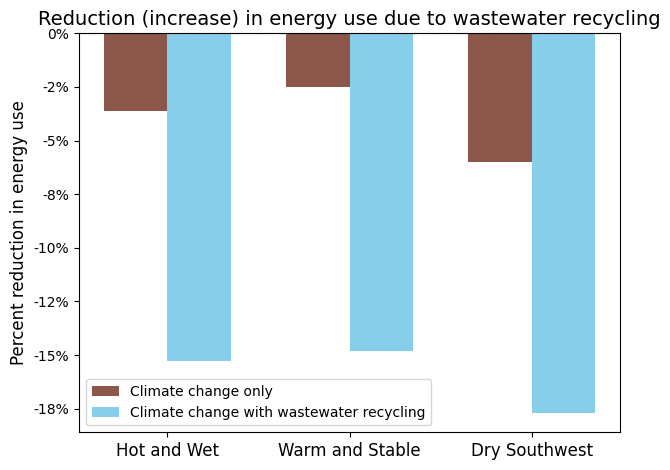

In [49]:
#get metric values with and without wastewater recycling, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_ww(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Indoor Coverage', 'Outdoor Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[3], compare5_values[3], compare6_values[3]]
bar_set2=[compare1_values[3], compare2_values[3], compare3_values[3]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with wastewater recycling', color='#87CEEB')


ax.set_ylabel('Percent reduction in energy use', fontsize=12)
ax.set_title('Reduction (increase) in energy use due to wastewater recycling', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

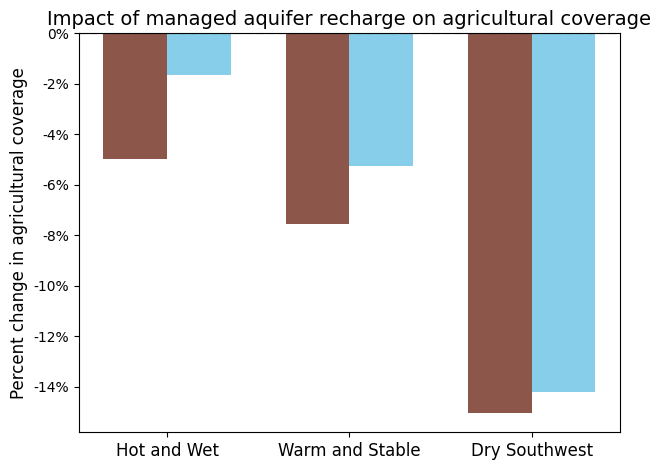

In [53]:
#get metric values with and without managed aquifer recharge, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020_mar, dfCESM1BGC2020_mar, dfCMCCCM2020_mar]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[0], compare5_values[0], compare6_values[0]]
bar_set2=[compare1_values[0], compare2_values[0], compare3_values[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with managed aquifer recharge', color='#87CEEB')


ax.set_ylabel('Percent change in agricultural coverage', fontsize=12)
ax.set_title('Impact of managed aquifer recharge on agricultural coverage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

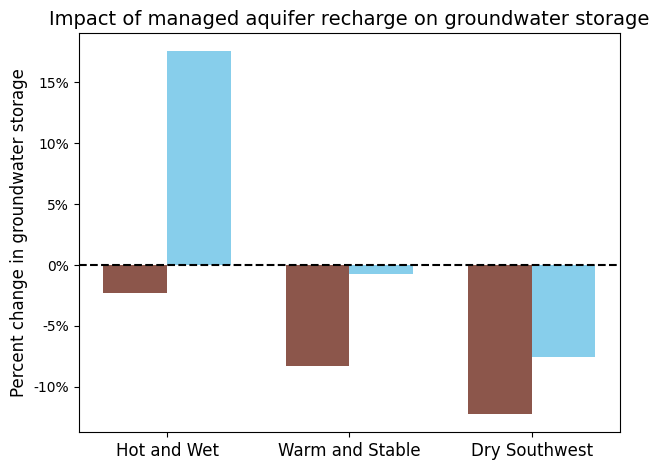

In [51]:
#get metric values with and without managed aquifer recharge, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020_mar, dfCESM1BGC2020_mar, dfCMCCCM2020_mar]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[1], compare5_values[1], compare6_values[1]]
bar_set2=[compare1_values[1], compare2_values[1], compare3_values[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with managed aquifer recharge', color='#87CEEB')


ax.set_ylabel('Percent change in groundwater storage', fontsize=12)
ax.set_title('Impact of managed aquifer recharge on groundwater storage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

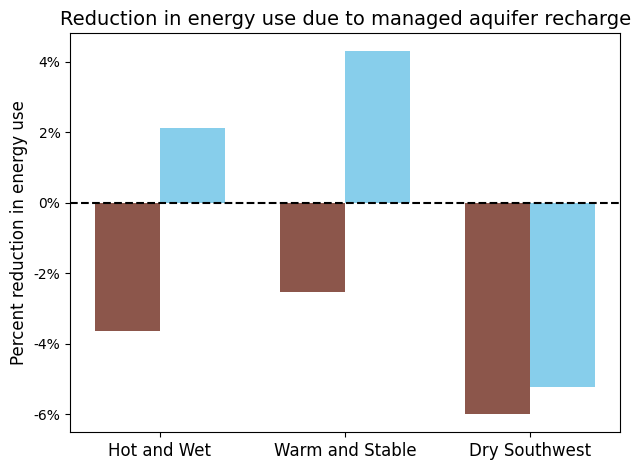

In [52]:
#get metric values with and without managed aquifer recharge, for each climate projection
baseline_values, compare1_values, compare2_values, compare3_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020_mar, dfCESM1BGC2020_mar, dfCMCCCM2020_mar]) #adaptation scenario lists
baseline_values, compare4_values, compare5_values, compare6_values = compare_total_values_mar(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020]) #climate scenario lists
# categories = ['Agricultural Coverage', 'Groundwater Storage', 'Energy Use Reduction']
labels = ['Hot and Wet', 'Warm and Stable', 'Dry Southwest']
bar_set1=[compare4_values[2], compare5_values[2], compare6_values[2]]
bar_set2=[compare1_values[2], compare2_values[2], compare3_values[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bar_set1, width, label='Climate change only', color='#8c564b')
rects2 = ax.bar(x + width/2, bar_set2, width, label='Climate change with managed aquifer recharge', color='#87CEEB')


ax.set_ylabel('Percent reduction in energy use', fontsize=12)
ax.set_title('Reduction in energy use due to managed aquifer recharge', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
# ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0%}'))
ax.axhline(y=0, color='black', linestyle='--')

fig.tight_layout()
plt.show()

This is old code, that was developed to learn/use the data

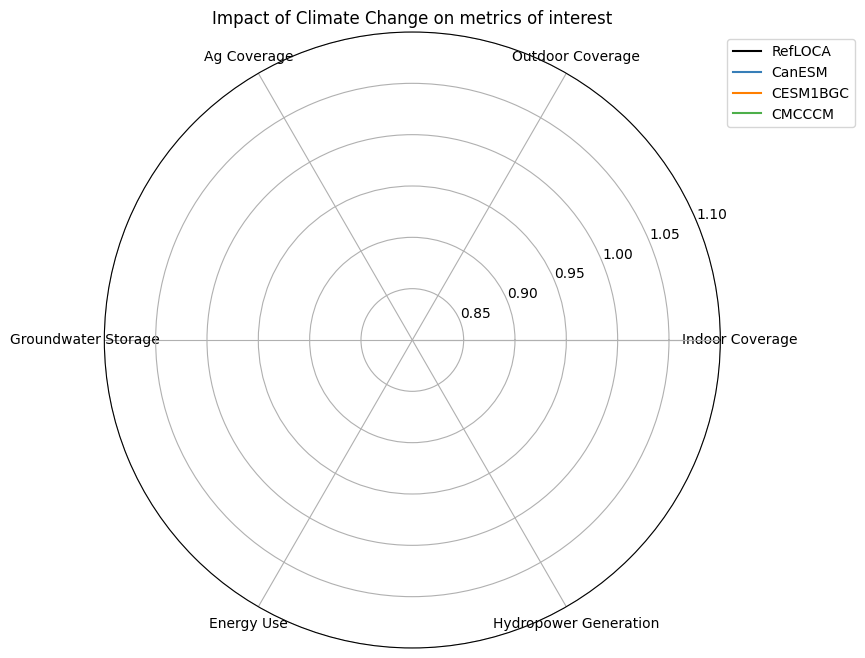

In [28]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

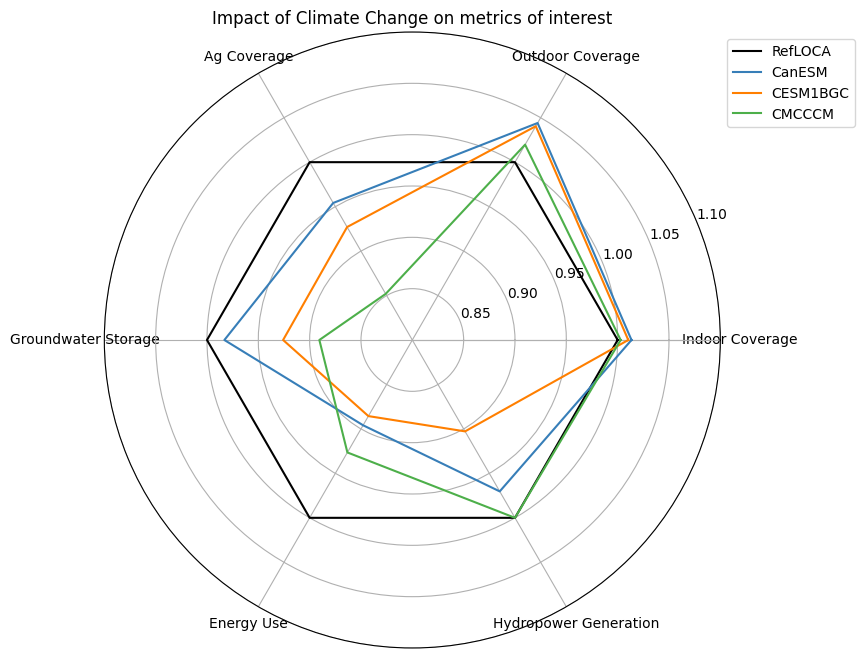

In [54]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

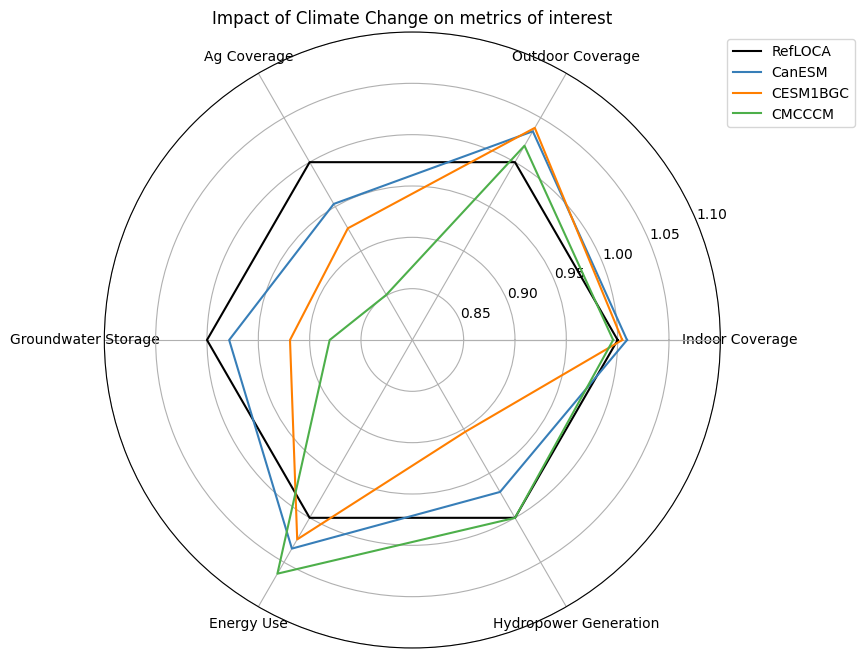

In [55]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020_out, dfCESM1BGC2020_out, dfCMCCCM2020_out])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

In [ ]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

In [ ]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

In [ ]:
RefLOCA_compare_values, CanESM_compare_values, CESM1BGC_compare_values, CMCCCM_compare_values = compare_total_values(dfRefLOCA2020, [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020])
categories = ['Indoor Coverage', 'Outdoor Coverage', 'Ag Coverage', 'Groundwater Storage', 'Energy Use', 'Hydropower Generation', '']

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a']

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, RefLOCA_compare_values, color='black', label='RefLOCA')
plt.polar(angles, CanESM_compare_values, color=CB_color_cycle[0], label='CanESM')
plt.polar(angles, CESM1BGC_compare_values, color=CB_color_cycle[1], label='CESM1BGC')
plt.polar(angles, CMCCCM_compare_values, color=CB_color_cycle[2], label='CMCCCM')
plt.ylim(.8, 1.1)

plt.xticks(angles, categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Impact of Climate Change on metrics of interest')
plt.show()

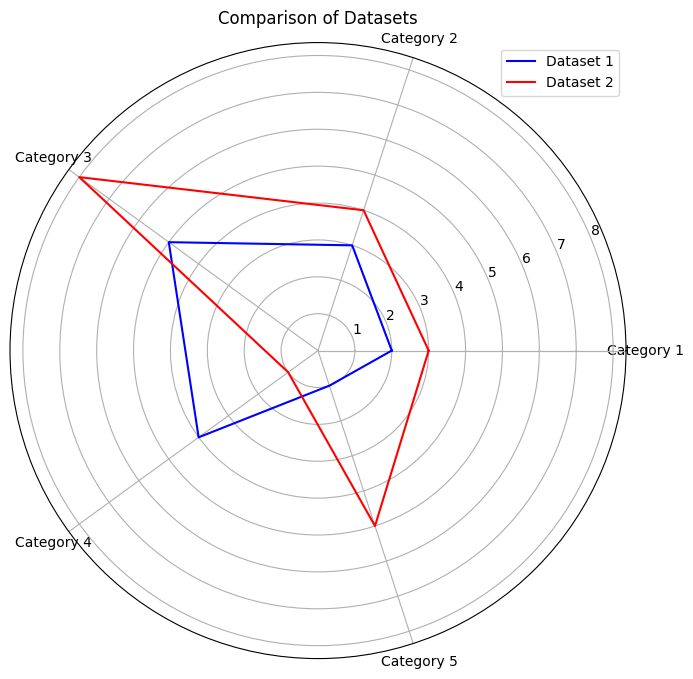

In [37]:
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', '']
values1 = [2, 3, 5, 4, 1, 2]
values2 = [3, 4, 8, 1, 5, 3]

angles = np.linspace(0, 2*np.pi, len(categories))

plt.figure(figsize=(8, 8))
plt.polar(angles, values1, color='blue', label='Dataset 1')
plt.polar(angles, values2, color='red', label='Dataset 2')
# plt.ylim(0, 6)

plt.xticks(angles, categories)
plt.legend()
plt.title('Comparison of Datasets')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

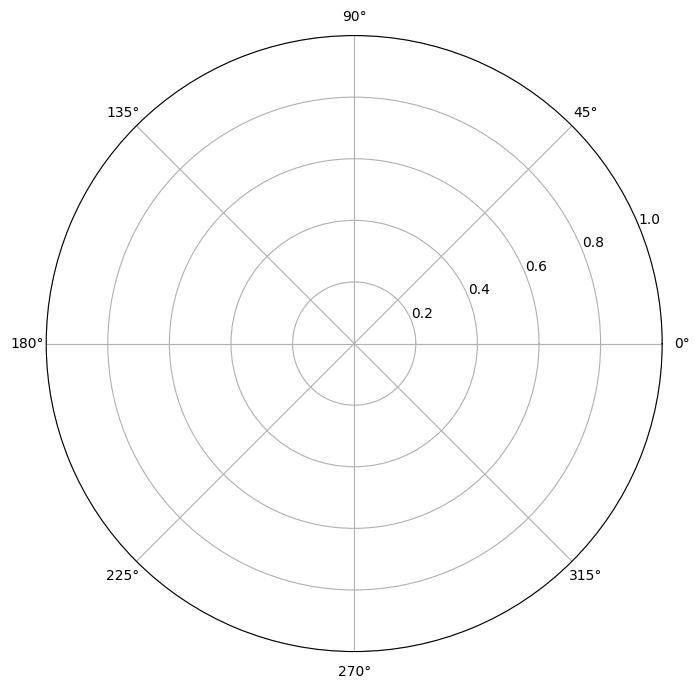

In [10]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values1 = [2, 3, 5, 4, 1]
values2 = [3, 4, 2, 1, 5]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
angles = np.append(angles, angles[0])

plt.figure(figsize=(8, 8))
plt.polar(angles, values1, color='blue', label='Dataset 1')
plt.polar(angles, values2, color='red', label='Dataset 2')

plt.xticks(angles[:-1], categories)  # Exclude the last angle from tick labels
plt.legend()
plt.title('Comparison of Datasets')
plt.show()